## 1) Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline
from scipy import stats
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%y').date()

## 2) Load the reviewers support dataset

In [3]:
data_reviewers_support=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\Msi Reviewers support ch.xlsx",header=0,date_parser='Date')
data_reviewers_support.head()

,Date,Link to incident,link to slack,Rating,Reviewers
0,2020-12-31,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Yuvaraja
1,2020-12-31,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shiva Kumar
2,2021-01-01,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Shiva Kumar
3,2021-01-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shiva Kumar
4,2021-01-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Rajeshwari


## 3) Create False Alarm column in this dataframe and consider all the ratings as false alarms

In [4]:
data_reviewers_support=data_reviewers_support.loc[:,['Date','Rating','Reviewers']]
data_reviewers_support.head()

,Date,Rating,Reviewers
0,2020-12-31,Wrong rating - Accident,Yuvaraja
1,2020-12-31,Wrong rating - No accident,Shiva Kumar
2,2021-01-01,Wrong rating - Accident,Shiva Kumar
3,2021-01-01,Wrong rating - No accident,Shiva Kumar
4,2021-01-01,Wrong rating - No accident,Rajeshwari


In [5]:
data_reviewers_support.shape

(175, 3)

In [6]:
data_reviewers_support.size

525

In [7]:
data_reviewers_support.isna().sum().to_frame().T

,Date,Rating,Reviewers
0,0,0,2


In [8]:
data_reviewers_support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       175 non-null    datetime64[ns]
 1   Rating     175 non-null    object        
 2   Reviewers  173 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 4.2+ KB


In [9]:
data_reviewers_support.describe()

,Date,Rating,Reviewers
count,175,175,173
unique,73,9,10
top,2021-03-14 00:00:00,Wrong rating - Accident,Aparna
freq,6,71,37
first,2020-12-31 00:00:00,NaN,NaN
last,2021-04-17 00:00:00,NaN,NaN


In [10]:
data_reviewers_support['Rating'].unique()

array(['Wrong rating - Accident', 'Wrong rating - No accident',
       'missed accident', 'No support', 'missed collision',
       'grabbed no submitted review',
       'P1 missed accident - review resubmitted',
       'Hard to rate incidents', 'last grabbed incident'], dtype=object)

#### New column creation

In [11]:
data_reviewers_support.loc[(data_reviewers_support.Rating=='Wrong rating - Accident'),'False_Alarm_Creation']='False Alarm'
data_reviewers_support.loc[(data_reviewers_support.Rating=='Wrong rating - No accident'),'False_Alarm_Creation']='False Alarm'
data_reviewers_support.loc[(data_reviewers_support.Rating=='missed accident'),'False_Alarm_Creation']='False Alarm'
data_reviewers_support.loc[(data_reviewers_support.Rating=='No support'),'False_Alarm_Creation']='False Alarm'
data_reviewers_support.loc[(data_reviewers_support.Rating=='missed collision'),'False_Alarm_Creation']='False Alarm'
data_reviewers_support.loc[(data_reviewers_support.Rating=='grabbed no submitted review'),'False_Alarm_Creation']='False Alarm'
data_reviewers_support.loc[(data_reviewers_support.Rating=='P1 missed accident - review resubmitted'),'False_Alarm_Creation']='False Alarm'
data_reviewers_support.loc[(data_reviewers_support.Rating=='Hard to rate incidents'),'False_Alarm_Creation']='False Alarm'
data_reviewers_support.loc[(data_reviewers_support.Rating=='last grabbed incident'),'False_Alarm_Creation']='False Alarm'

In [12]:
data_reviewers_support.head(30)

,Date,Rating,Reviewers,False_Alarm_Creation
0,2020-12-31,Wrong rating - Accident,Yuvaraja,False Alarm
1,2020-12-31,Wrong rating - No accident,Shiva Kumar,False Alarm
2,2021-01-01,Wrong rating - Accident,Shiva Kumar,False Alarm
3,2021-01-01,Wrong rating - No accident,Shiva Kumar,False Alarm
4,2021-01-01,Wrong rating - No accident,Rajeshwari,False Alarm
5,2021-01-02,Wrong rating - Accident,Rajeshwari,False Alarm
6,2021-01-03,Wrong rating - Accident,Narendra,False Alarm
7,2021-01-03,Wrong rating - Accident,Narendra,False Alarm
8,2021-01-03,Wrong rating - No accident,Aparna,False Alarm
9,2021-01-04,Wrong rating - Accident,Yuvaraja,False Alarm


## 4) Creating Weekly basis report for calculating the false alarms

#### 1] last week of December 2020 - January 2021 from 31.12.2020 - 03.01.2021

In [13]:
data_reviewers_support1=data_reviewers_support[(data_reviewers_support['Date'] >= '2020-12-31') & (data_reviewers_support['Date'] <= '2021-01-03')]
data_reviewers_support1

,Date,Rating,Reviewers,False_Alarm_Creation
0,2020-12-31,Wrong rating - Accident,Yuvaraja,False Alarm
1,2020-12-31,Wrong rating - No accident,Shiva Kumar,False Alarm
2,2021-01-01,Wrong rating - Accident,Shiva Kumar,False Alarm
3,2021-01-01,Wrong rating - No accident,Shiva Kumar,False Alarm
4,2021-01-01,Wrong rating - No accident,Rajeshwari,False Alarm
5,2021-01-02,Wrong rating - Accident,Rajeshwari,False Alarm
6,2021-01-03,Wrong rating - Accident,Narendra,False Alarm
7,2021-01-03,Wrong rating - Accident,Narendra,False Alarm
8,2021-01-03,Wrong rating - No accident,Aparna,False Alarm


#### Count the number of False alarms and the reviewers

In [14]:
data_reviewers_support1['False_Alarm_Creation'].count()

9

In [15]:
data_reviewers_support1['Reviewers'].value_counts()

Shiva Kumar    3
Narendra       2
Rajeshwari     2
Yuvaraja       1
Aparna         1
Name: Reviewers, dtype: int64

In [16]:
data_reviewers_support1['Reviewers'].count()

9

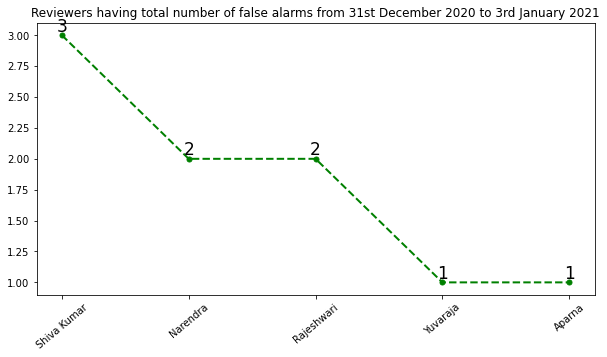

In [17]:
X=data_reviewers_support1['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers having total number of false alarms from 31st December 2020 to 3rd January 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.03, "%d" %v, ha="center",fontdict={'fontsize':'17'})
plt.show()

#### 2] 1st week January 2021 from 04.01.2021 - 10.01.2021

In [18]:
data_reviewers_support2=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-01-04') & (data_reviewers_support['Date'] <= '2021-01-10')]
data_reviewers_support2

,Date,Rating,Reviewers,False_Alarm_Creation
9,2021-01-04,Wrong rating - Accident,Yuvaraja,False Alarm
10,2021-01-04,Wrong rating - Accident,Mallikarjun,False Alarm
11,2021-01-04,Wrong rating - Accident,Yuvaraja,False Alarm
12,2021-01-05,Wrong rating - No accident,Mallikarjun,False Alarm
13,2021-01-05,Wrong rating - No accident,Rajeshwari,False Alarm
14,2021-01-07,Wrong rating - No accident,Shiva Kumar,False Alarm
15,2021-01-08,Wrong rating - No accident,Rajeshwari,False Alarm
16,2021-01-09,Wrong rating - No accident,Aparna,False Alarm
17,2021-01-10,Wrong rating - No accident,Rajeshwari,False Alarm


#### Count the number of False alarms and the reviewers

In [19]:
data_reviewers_support2['False_Alarm_Creation'].count()

9

In [20]:
data_reviewers_support2['Reviewers'].value_counts()

Rajeshwari     3
Yuvaraja       2
Mallikarjun    2
Aparna         1
Shiva Kumar    1
Name: Reviewers, dtype: int64

In [21]:
data_reviewers_support2['Reviewers'].count()

9

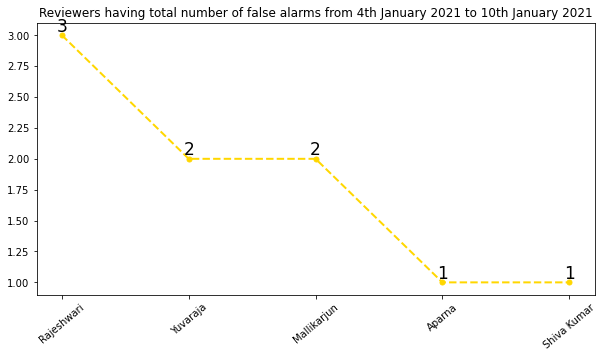

In [22]:
X=data_reviewers_support2['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='gold', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers having total number of false alarms from 4th January 2021 to 10th January 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.03, "%d" %v, ha="center",fontdict={'fontsize':'17'})
plt.show()

#### 3] 2nd week January 2021 from 11.01.2021 - 17.01.2021

In [23]:
data_reviewers_support3=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-01-11') & (data_reviewers_support['Date'] <= '2021-01-17')]
data_reviewers_support3

,Date,Rating,Reviewers,False_Alarm_Creation
18,2021-01-11,missed accident,Yuvaraja,False Alarm
19,2021-01-11,missed accident,Shiva Kumar,False Alarm
20,2021-01-11,missed accident,Rajeshwari,False Alarm
21,2021-01-11,missed accident,Mallikarjun,False Alarm
22,2021-01-11,Wrong rating - Accident,Rajeshwari,False Alarm
23,2021-01-12,Wrong rating - Accident,Aparna,False Alarm
24,2021-01-12,Wrong rating - No accident,Shivam,False Alarm
25,2021-01-12,missed accident,Mallikarjun,False Alarm
26,2021-01-12,Wrong rating - Accident,Mallikarjun,False Alarm
27,2021-01-12,Wrong rating - No accident,Mallikarjun,False Alarm


#### Count the number of False alarms and the reviewers

In [24]:
data_reviewers_support3['False_Alarm_Creation'].count()

24

In [25]:
data_reviewers_support3['Reviewers'].value_counts()

Shiva Kumar    6
Rajeshwari     6
Mallikarjun    4
Aparna         3
Shivam         2
Yuvaraja       2
Kiran          1
Name: Reviewers, dtype: int64

In [26]:
data_reviewers_support3['Reviewers'].count()

24

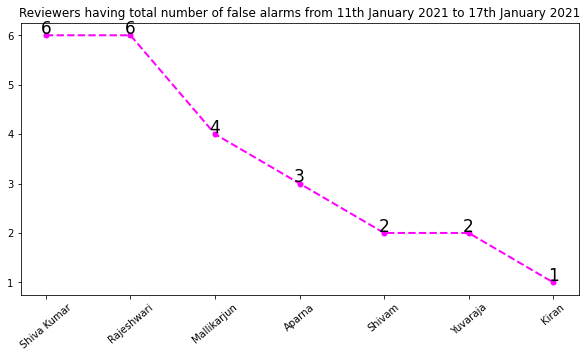

In [27]:
X=data_reviewers_support3['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='magenta', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers having total number of false alarms from 11th January 2021 to 17th January 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.03, "%d" %v, ha="center",fontdict={'fontsize':'17'})
plt.show()

#### 4] 3rd week January 2021 from 18.01.2021 - 24.01.2021

In [28]:
data_reviewers_support4=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-01-18') & (data_reviewers_support['Date'] <= '2021-01-24')]
data_reviewers_support4

,Date,Rating,Reviewers,False_Alarm_Creation
41,2021-01-18,Wrong rating - No accident,Narendra,False Alarm
42,2021-01-18,Wrong rating - No accident,Kiran,False Alarm
43,2021-01-18,Wrong rating - Accident,Shivam,False Alarm
45,2021-01-18,missed accident,Narendra,False Alarm
46,2021-01-20,No support,NaN,False Alarm
47,2021-01-20,No support,NaN,False Alarm
48,2021-01-22,Wrong rating - No accident,Mallikarjun,False Alarm
49,2021-01-24,missed collision,Mallikarjun,False Alarm
50,2021-01-24,missed collision,Narendra,False Alarm
51,2021-01-24,missed collision,Yuvaraja,False Alarm


#### Count the number of False alarms and the reviewers

In [29]:
data_reviewers_support4['False_Alarm_Creation'].count()

10

In [30]:
data_reviewers_support4['Reviewers'].value_counts()

Narendra       3
Mallikarjun    2
Shivam         1
Yuvaraja       1
Kiran          1
Name: Reviewers, dtype: int64

In [31]:
data_reviewers_support4['Reviewers'].count()

8

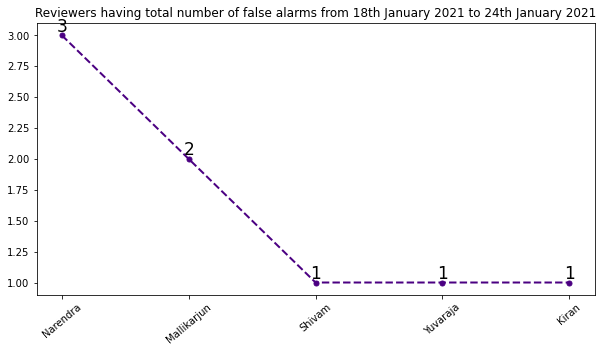

In [32]:
X=data_reviewers_support4['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='indigo', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers having total number of false alarms from 18th January 2021 to 24th January 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.03, "%d" %v, ha="center",fontdict={'fontsize':'17'})
plt.show()

#### 5] Last week January 2021 from 25.01.2021 - 31.01.2021

In [33]:
data_reviewers_support5=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-01-25') & (data_reviewers_support['Date'] <= '2021-01-31')]
data_reviewers_support5

,Date,Rating,Reviewers,False_Alarm_Creation
52,2021-01-25,missed collision,Narendra,False Alarm
53,2021-01-25,missed collision,Mallikarjun,False Alarm
54,2021-01-25,No support,Shiva Kumar,False Alarm
55,2021-01-27,missed collision,Shiva Kumar,False Alarm
56,2021-01-27,missed collision,Yuvaraja,False Alarm
57,2021-01-27,missed collision,Yuvaraja,False Alarm
58,2021-01-29,Wrong rating - No accident,Narendra,False Alarm


#### Count the number of False alarms and the reviewers

In [34]:
data_reviewers_support5['False_Alarm_Creation'].count()

7

In [35]:
data_reviewers_support5['Reviewers'].value_counts()

Yuvaraja       2
Shiva Kumar    2
Narendra       2
Mallikarjun    1
Name: Reviewers, dtype: int64

In [36]:
data_reviewers_support5['Reviewers'].count()

7

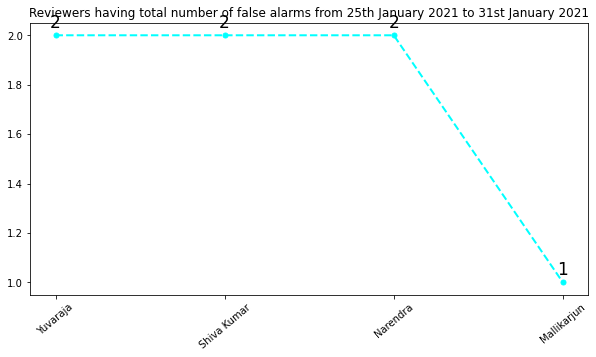

In [37]:
X=data_reviewers_support5['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='cyan', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers having total number of false alarms from 25th January 2021 to 31st January 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.03, "%d" %v, ha="center",fontdict={'fontsize':'17'})
plt.show()

#### 6] 1st week February 2021 from 01.02.2021 - 07.02.2021

In [38]:
data_reviewers_support6=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-02-01') & (data_reviewers_support['Date'] <= '2021-02-07')]
data_reviewers_support6

,Date,Rating,Reviewers,False_Alarm_Creation
59,2021-02-01,missed collision,Shivam,False Alarm
60,2021-02-01,missed collision,Aparna,False Alarm
61,2021-02-02,missed collision,Aparna,False Alarm
62,2021-02-03,missed collision,Yuvaraja,False Alarm
63,2021-02-03,missed collision,Aparna,False Alarm
64,2021-02-03,missed collision,Aparna,False Alarm
65,2021-02-03,missed collision,Yuvaraja,False Alarm
66,2021-02-03,missed collision,Aparna,False Alarm
67,2021-02-04,missed collision,Yuvaraja,False Alarm
68,2021-02-04,Wrong rating - No accident,Shivam,False Alarm


#### Count the number of False alarms and the reviewers

In [39]:
data_reviewers_support6['False_Alarm_Creation'].count()

18

In [40]:
data_reviewers_support6['Reviewers'].value_counts()

Aparna        7
Shivam        5
Yuvaraja      3
Rajeshwari    2
Narendra      1
Name: Reviewers, dtype: int64

In [41]:
data_reviewers_support6['Reviewers'].count()

18

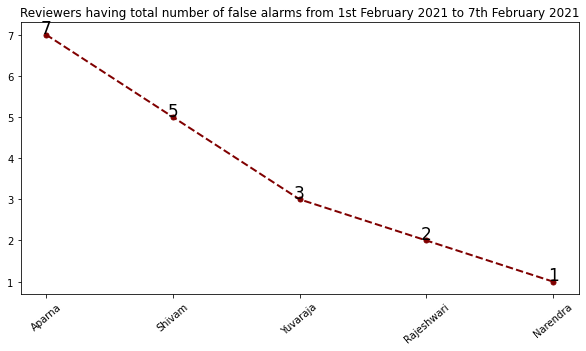

In [42]:
X=data_reviewers_support6['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='maroon', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers having total number of false alarms from 1st February 2021 to 7th February 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.03, "%d" %v, ha="center",fontdict={'fontsize':'17'})
plt.show()

#### 7] 2nd week February 2021 from 08.02.2021 - 14.02.2021

In [43]:
data_reviewers_support7=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-02-08') & (data_reviewers_support['Date'] <= '2021-02-14')]
data_reviewers_support7

,Date,Rating,Reviewers,False_Alarm_Creation
77,2021-02-08,No support,Shiva Kumar,False Alarm
78,2021-02-12,missed collision,Shivam,False Alarm
79,2021-02-12,missed collision,Yuvaraja,False Alarm


#### Count the number of False alarms and the reviewers

In [44]:
data_reviewers_support7['False_Alarm_Creation'].count()

3

In [45]:
data_reviewers_support7['Reviewers'].value_counts()

Shivam         1
Yuvaraja       1
Shiva Kumar    1
Name: Reviewers, dtype: int64

In [46]:
data_reviewers_support7['Reviewers'].count()

3

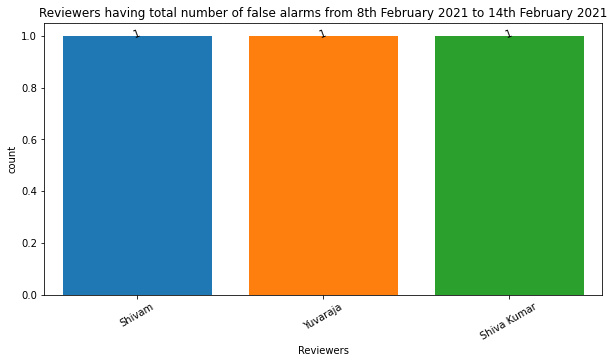

In [47]:
plt.figure(figsize=(10,5))
splot=sns.countplot(data_reviewers_support7['Reviewers'],order=data_reviewers_support7['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers having total number of false alarms from 8th February 2021 to 14th February 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 8] 3rd week February 2021 from 15.02.2021 - 21.02.2021

In [48]:
data_reviewers_support8=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-02-15') & (data_reviewers_support['Date'] <= '2021-02-21')]
data_reviewers_support8

,Date,Rating,Reviewers,False_Alarm_Creation
80,2021-02-16,missed collision,Kiran,False Alarm
81,2021-02-16,missed collision,Narendra,False Alarm
82,2021-02-16,missed collision,Narendra,False Alarm


#### Count the number of False alarms and the reviewers

In [49]:
data_reviewers_support8['False_Alarm_Creation'].count()

3

In [50]:
data_reviewers_support8['Reviewers'].value_counts()

Narendra    2
Kiran       1
Name: Reviewers, dtype: int64

In [51]:
data_reviewers_support8['Reviewers'].count()

3

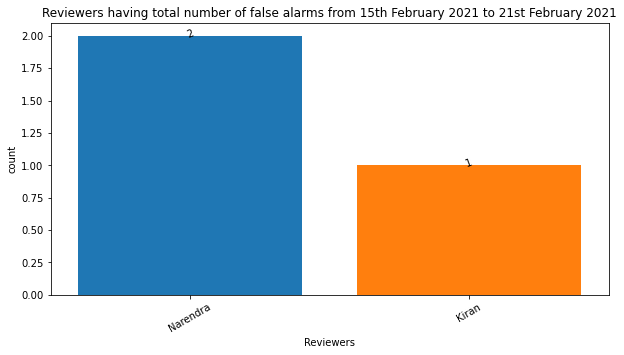

In [52]:
plt.figure(figsize=(10,5))
splot=sns.countplot(data_reviewers_support8['Reviewers'],order=data_reviewers_support8['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers having total number of false alarms from 15th February 2021 to 21st February 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 9] Last week February 2021 from 22.02.2021 - 28.02.2021

In [53]:
data_reviewers_support9=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-02-22') & (data_reviewers_support['Date'] <= '2021-02-28')]
data_reviewers_support9

,Date,Rating,Reviewers,False_Alarm_Creation
83,2021-02-22,missed collision,Shivam,False Alarm
84,2021-02-22,missed collision,Aparna,False Alarm
85,2021-02-22,missed collision,Aparna,False Alarm
86,2021-02-23,missed collision,Shiva Kumar,False Alarm
87,2021-02-23,missed collision,Rajeshwari,False Alarm
88,2021-02-23,missed collision,Rajeshwari,False Alarm
89,2021-02-24,Wrong rating - No accident,Aparna,False Alarm
90,2021-02-24,Wrong rating - No accident,Shivam,False Alarm
91,2021-02-25,Wrong rating - No accident,Kiran,False Alarm
92,2021-02-25,Wrong rating - No accident,Yuvaraja,False Alarm


#### Count the number of False alarms and the reviewers

In [54]:
data_reviewers_support9['False_Alarm_Creation'].count()

14

In [55]:
data_reviewers_support9['Reviewers'].value_counts()

Aparna         4
Shivam         3
Shiva Kumar    2
Rajeshwari     2
Kiran          2
Yuvaraja       1
Name: Reviewers, dtype: int64

In [56]:
data_reviewers_support9['Reviewers'].count()

14

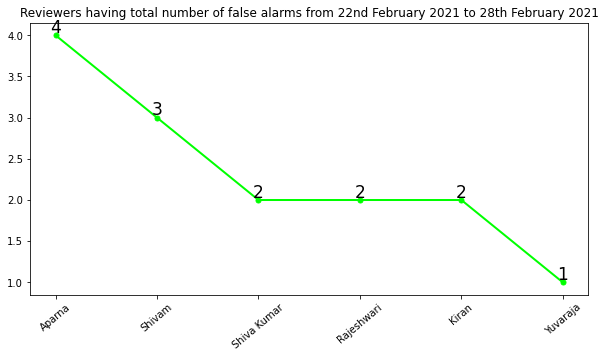

In [57]:
X=data_reviewers_support9['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='lime', marker='o', linestyle='solid',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers having total number of false alarms from 22nd February 2021 to 28th February 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.03, "%d" %v, ha="center",fontdict={'fontsize':'17'})
plt.show()

#### 10] 1st week March 2021 from 01.03.2021 - 07.03.2021

In [58]:
data_reviewers_support10=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-03-01') & (data_reviewers_support['Date'] <= '2021-03-07')]
data_reviewers_support10

,Date,Rating,Reviewers,False_Alarm_Creation
97,2021-03-01,Wrong rating - No accident,Shiva Kumar,False Alarm
98,2021-03-02,Wrong rating - Accident,Aparna,False Alarm
99,2021-03-02,Wrong rating - Accident,Shivam,False Alarm
100,2021-03-03,Wrong rating - Accident,Narendra,False Alarm
101,2021-03-03,Wrong rating - Accident,Aparna,False Alarm
102,2021-03-03,Wrong rating - Accident,Aparna,False Alarm
103,2021-03-03,Wrong rating - Accident,Narendra,False Alarm
104,2021-03-03,Wrong rating - No accident,Narendra,False Alarm
105,2021-03-04,Wrong rating - No accident,Kiran,False Alarm
106,2021-03-04,Wrong rating - No accident,Yuvaraja,False Alarm


#### Count the number of False alarms and the reviewers

In [59]:
data_reviewers_support10['False_Alarm_Creation'].count()

18

In [60]:
data_reviewers_support10['Reviewers'].value_counts()

Aparna         5
Narendra       4
Yuvaraja       3
Kiran          3
Shivam         2
Shiva Kumar    1
Name: Reviewers, dtype: int64

In [61]:
data_reviewers_support10['Reviewers'].count()

18

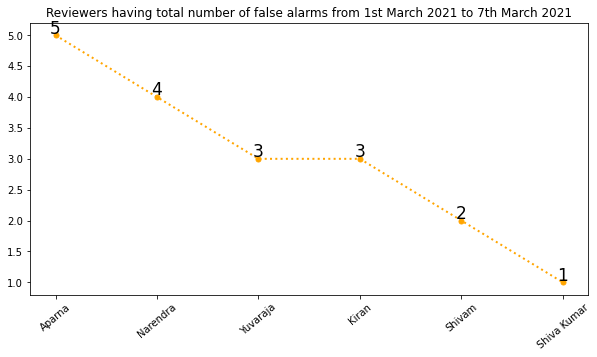

In [62]:
X=data_reviewers_support10['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='orange', marker='o', linestyle='dotted',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers having total number of false alarms from 1st March 2021 to 7th March 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.03, "%d" %v, ha="center",fontdict={'fontsize':'17'})
plt.show()

#### 11] 2nd week March 2021 from 08.03.2021 - 14.03.2021

In [63]:
data_reviewers_support11=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-03-08') & (data_reviewers_support['Date'] <= '2021-03-14')]
data_reviewers_support11

,Date,Rating,Reviewers,False_Alarm_Creation
115,2021-03-09,Wrong rating - Accident,Aparna,False Alarm
116,2021-03-09,Wrong rating - Accident,Shivam,False Alarm
117,2021-03-11,Wrong rating - Accident,Aparna,False Alarm
118,2021-03-11,Wrong rating - Accident,Shivam,False Alarm
119,2021-03-13,Wrong rating - No accident,Aparna,False Alarm
120,2021-03-13,Wrong rating - No accident,Shivam,False Alarm
121,2021-03-14,Wrong rating - Accident,Shiva Kumar,False Alarm
122,2021-03-14,Wrong rating - Accident,Shivam,False Alarm
123,2021-03-14,Hard to rate incidents,Aparna,False Alarm
124,2021-03-14,Hard to rate incidents,Shivam,False Alarm


#### Count the number of False alarms and the reviewers

In [64]:
data_reviewers_support11['False_Alarm_Creation'].count()

12

In [65]:
data_reviewers_support11['Reviewers'].value_counts()

Shivam         6
Aparna         5
Shiva Kumar    1
Name: Reviewers, dtype: int64

In [66]:
data_reviewers_support11['Reviewers'].count()

12

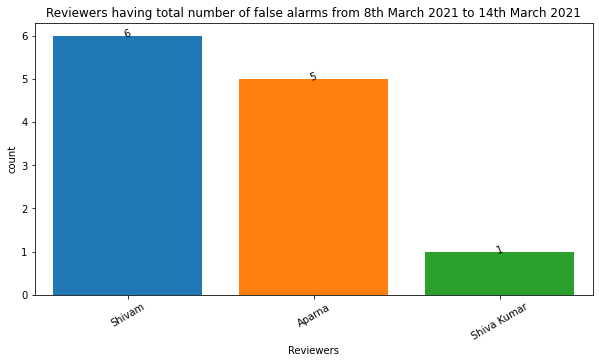

In [67]:
plt.figure(figsize=(10,5))
splot=sns.countplot(data_reviewers_support11['Reviewers'],order=data_reviewers_support11['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers having total number of false alarms from 8th March 2021 to 14th March 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 12] 3rd week March 2021 from 15.03.2021 - 21.03.2021

In [68]:
data_reviewers_support12=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-03-15') & (data_reviewers_support['Date'] <= '2021-03-21')]
data_reviewers_support12

,Date,Rating,Reviewers,False_Alarm_Creation
127,2021-03-15,Wrong rating - Accident,Shiva Kumar,False Alarm
128,2021-03-15,Wrong rating - Accident,Rajeshwari,False Alarm
129,2021-03-18,Wrong rating - Accident,Mallikarjun,False Alarm
130,2021-03-18,Wrong rating - Accident,Yuvaraja,False Alarm
131,2021-03-19,Wrong rating - Accident,Narendra,False Alarm
132,2021-03-19,Wrong rating - Accident,Kiran,False Alarm
133,2021-03-19,Wrong rating - Accident,Kiran,False Alarm
134,2021-03-20,Wrong rating - Accident,Shivam,False Alarm
135,2021-03-20,Wrong rating - No accident,Shivam,False Alarm
136,2021-03-20,Wrong rating - No accident,Aparna,False Alarm


####  Count the number of False alarms and the reviewers

In [69]:
data_reviewers_support12['False_Alarm_Creation'].count()

12

In [70]:
data_reviewers_support12['Reviewers'].value_counts()

Kiran          2
Shivam         2
Aparna         2
Mallikarjun    2
Shiva Kumar    1
Narendra       1
Yuvaraja       1
Rajeshwari     1
Name: Reviewers, dtype: int64

In [71]:
data_reviewers_support12['Reviewers'].count()

12

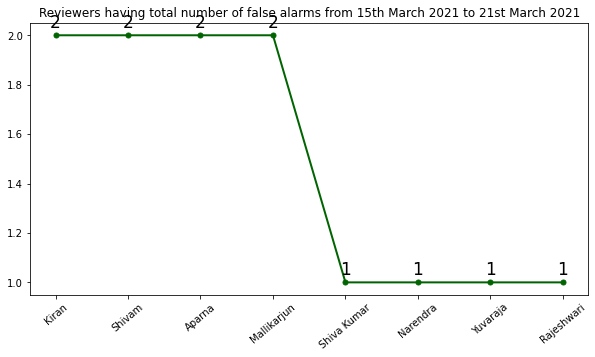

In [72]:
X=data_reviewers_support12['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='darkgreen', marker='o',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers having total number of false alarms from 15th March 2021 to 21st March 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.03, "%d" %v, ha="center",fontdict={'fontsize':'17'})
plt.show()

#### 13] 4th week March 2021 from 22.03.2021 - 28.03.2021

In [73]:
data_reviewers_support13=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-03-22') & (data_reviewers_support['Date'] <= '2021-03-28')]
data_reviewers_support13

,Date,Rating,Reviewers,False_Alarm_Creation
139,2021-03-23,Wrong rating - No accident,Yuvaraja,False Alarm
140,2021-03-26,Wrong rating - Accident,Rajeshwari,False Alarm
141,2021-03-26,Wrong rating - Accident,Shiva Kumar,False Alarm


#### Count the number of False alarms and the reviewers

In [74]:
data_reviewers_support13['False_Alarm_Creation'].count()

3

In [75]:
data_reviewers_support13['Reviewers'].value_counts()

Shiva Kumar    1
Yuvaraja       1
Rajeshwari     1
Name: Reviewers, dtype: int64

In [76]:
data_reviewers_support13['Reviewers'].count()

3

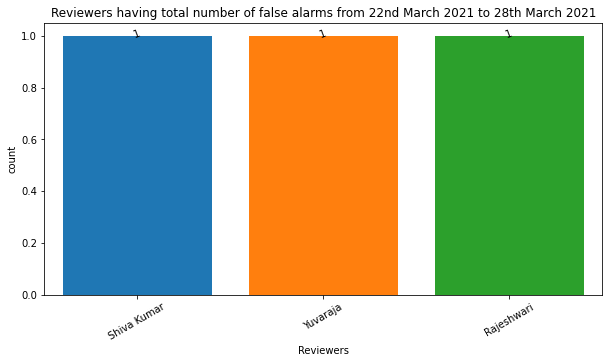

In [77]:
plt.figure(figsize=(10,5))
splot=sns.countplot(data_reviewers_support13['Reviewers'],order=data_reviewers_support13['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers having total number of false alarms from 22nd March 2021 to 28th March 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 14] Last week of March 2021 - April 2021 from 29.03.2021 - 04.04.2021

In [78]:
data_reviewers_support14=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-03-29') & (data_reviewers_support['Date'] <= '2021-04-04')]
data_reviewers_support14

,Date,Rating,Reviewers,False_Alarm_Creation
142,2021-03-29,Wrong rating - Accident,Kiran,False Alarm
143,2021-03-29,Wrong rating - Accident,Narendra,False Alarm
144,2021-03-29,last grabbed incident,Shivam,False Alarm
145,2021-03-29,last grabbed incident,Mallikarjun,False Alarm
146,2021-03-30,Wrong rating - Accident,Kiran,False Alarm
147,2021-03-31,Wrong rating - Accident,Shivam,False Alarm
148,2021-03-31,Wrong rating - Accident,Aparna,False Alarm
149,2021-03-31,Wrong rating - Accident,Shivam,False Alarm
150,2021-03-31,Wrong rating - Accident,Aparna,False Alarm
151,2021-04-04,Wrong rating - Accident,Shivam,False Alarm


#### Count the number of False alarms and the reviewers

In [79]:
data_reviewers_support14['False_Alarm_Creation'].count()

12

In [80]:
data_reviewers_support14['Reviewers'].value_counts()

Shivam         4
Aparna         4
Kiran          2
Narendra       1
Mallikarjun    1
Name: Reviewers, dtype: int64

In [81]:
data_reviewers_support14['Reviewers'].count()

12

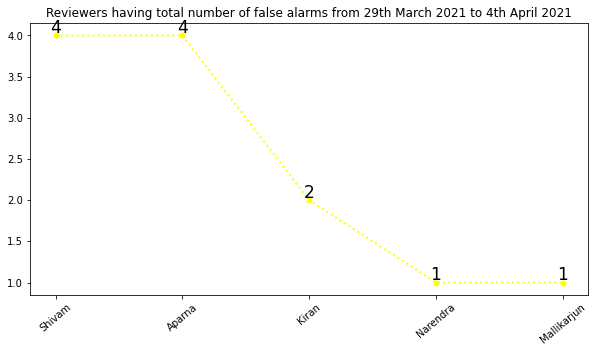

In [82]:
X=data_reviewers_support14['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='yellow', marker='o', linestyle='dotted',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers having total number of false alarms from 29th March 2021 to 4th April 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.03, "%d" %v, ha="center",fontdict={'fontsize':'17'})
plt.show()


#### 15] 1st week April 2021 from 05.04.2021 - 11.04.2021

In [83]:
data_reviewers_support15=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-04-05') & (data_reviewers_support['Date'] <= '2021-04-11')]
data_reviewers_support15

,Date,Rating,Reviewers,False_Alarm_Creation
154,2021-04-05,Wrong rating - No accident,Leenu,False Alarm
155,2021-04-05,Wrong rating - No accident,Shiva Kumar,False Alarm
156,2021-04-06,Wrong rating - No accident,Leenu,False Alarm
157,2021-04-06,Wrong rating - No accident,Shiva Kumar,False Alarm
158,2021-04-07,Wrong rating - Accident,Raushan,False Alarm
159,2021-04-07,Wrong rating - Accident,Aparna,False Alarm
160,2021-04-08,Wrong rating - No accident,Raushan,False Alarm
161,2021-04-08,Wrong rating - No accident,Aparna,False Alarm
162,2021-04-10,Wrong rating - Accident,Raushan,False Alarm
163,2021-04-10,Wrong rating - Accident,Aparna,False Alarm


#### Count the number of False alarms and the reviewers

In [84]:
data_reviewers_support15['False_Alarm_Creation'].count()

11

In [85]:
data_reviewers_support15['Reviewers'].value_counts()

Raushan        4
Aparna         3
Shiva Kumar    2
Leenu          2
Name: Reviewers, dtype: int64

In [86]:
data_reviewers_support15['Reviewers'].count()

11

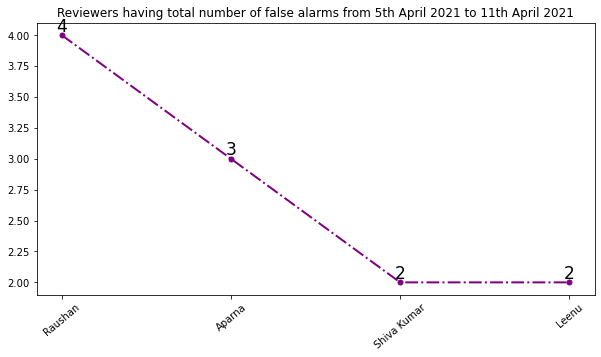

In [87]:
X=data_reviewers_support15['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='purple', marker='o', linestyle='dashdot',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers having total number of false alarms from 5th April 2021 to 11th April 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.03, "%d" %v, ha="center",fontdict={'fontsize':'17'})
plt.show()

#### 16] 2nd week April 2021 from 12.04.2021 - 17.04.2021

In [88]:
data_reviewers_support16=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-04-12') & (data_reviewers_support['Date'] <= '2021-04-17')]
data_reviewers_support16

,Date,Rating,Reviewers,False_Alarm_Creation
165,2021-04-12,No support,Shivam,False Alarm
166,2021-04-12,No support,Shivam,False Alarm
167,2021-04-13,No support,Shiva Kumar,False Alarm
168,2021-04-14,Wrong rating - Accident,Raushan,False Alarm
169,2021-04-14,Wrong rating - Accident,Aparna,False Alarm
170,2021-04-15,Wrong rating - Accident,Shivam,False Alarm
171,2021-04-15,Wrong rating - Accident,Aparna,False Alarm
172,2021-04-15,Wrong rating - No accident,Yuvaraja,False Alarm
173,2021-04-16,Wrong rating - Accident,Rajeshwari,False Alarm
174,2021-04-17,Wrong rating - Accident,Mallikarjun,False Alarm


#### Count the number of False alarms and the reviewers

In [89]:
data_reviewers_support16['False_Alarm_Creation'].count()

10

In [90]:
data_reviewers_support16['Reviewers'].value_counts()

Shivam         3
Aparna         2
Shiva Kumar    1
Raushan        1
Yuvaraja       1
Rajeshwari     1
Mallikarjun    1
Name: Reviewers, dtype: int64

In [91]:
data_reviewers_support16['Reviewers'].count()

10

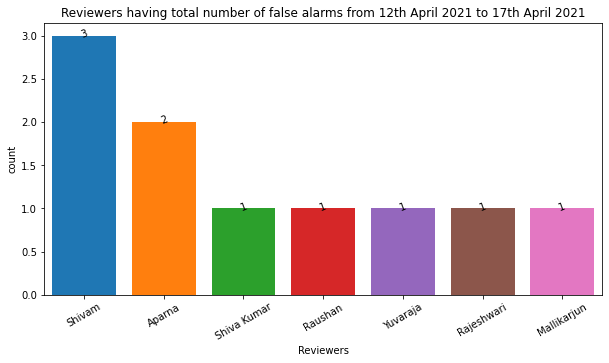

In [92]:
plt.figure(figsize=(10,5))
splot=sns.countplot(data_reviewers_support16['Reviewers'],order=data_reviewers_support16['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers having total number of false alarms from 12th April 2021 to 17th April 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

## 5) Creating Monthly basis report for calculating the false alarms
### 1] 31st December 2021

In [93]:
data_reviewers_support_December=data_reviewers_support[(data_reviewers_support['Date'] == '2020-12-31')]
data_reviewers_support_December

,Date,Rating,Reviewers,False_Alarm_Creation
0,2020-12-31,Wrong rating - Accident,Yuvaraja,False Alarm
1,2020-12-31,Wrong rating - No accident,Shiva Kumar,False Alarm


#### Count the number of False alarms and the reviewers

In [94]:
data_reviewers_support_December['False_Alarm_Creation'].count()

2

In [95]:
data_reviewers_support_December['Reviewers'].value_counts()

Yuvaraja       1
Shiva Kumar    1
Name: Reviewers, dtype: int64

In [96]:
data_reviewers_support_December['Reviewers'].count()

2

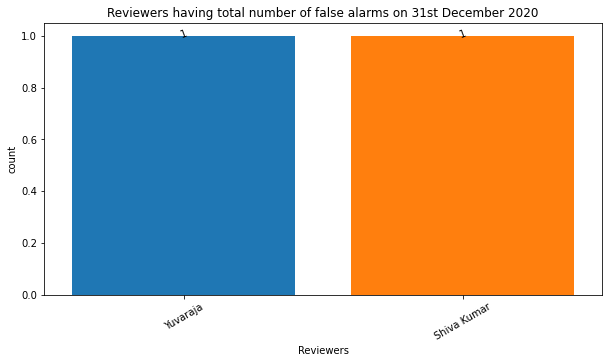

In [97]:
plt.figure(figsize=(10,5))
splot=sns.countplot(data_reviewers_support_December['Reviewers'],order=data_reviewers_support_December['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers having total number of false alarms on 31st December 2020", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 2] January 2021

In [98]:
data_reviewers_support_January=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-01-01') & (data_reviewers_support['Date'] <= '2021-01-31')]
data_reviewers_support_January

,Date,Rating,Reviewers,False_Alarm_Creation
2,2021-01-01,Wrong rating - Accident,Shiva Kumar,False Alarm
3,2021-01-01,Wrong rating - No accident,Shiva Kumar,False Alarm
4,2021-01-01,Wrong rating - No accident,Rajeshwari,False Alarm
5,2021-01-02,Wrong rating - Accident,Rajeshwari,False Alarm
6,2021-01-03,Wrong rating - Accident,Narendra,False Alarm
7,2021-01-03,Wrong rating - Accident,Narendra,False Alarm
8,2021-01-03,Wrong rating - No accident,Aparna,False Alarm
9,2021-01-04,Wrong rating - Accident,Yuvaraja,False Alarm
10,2021-01-04,Wrong rating - Accident,Mallikarjun,False Alarm
11,2021-01-04,Wrong rating - Accident,Yuvaraja,False Alarm


#### Count the number of False alarms and the reviewers

In [99]:
data_reviewers_support_January['False_Alarm_Creation'].count()

57

In [100]:
data_reviewers_support_January['Reviewers'].value_counts()

Shiva Kumar    11
Rajeshwari     11
Mallikarjun     9
Narendra        7
Yuvaraja        7
Aparna          5
Shivam          3
Kiran           2
Name: Reviewers, dtype: int64

In [101]:
data_reviewers_support_January['Reviewers'].count()

55

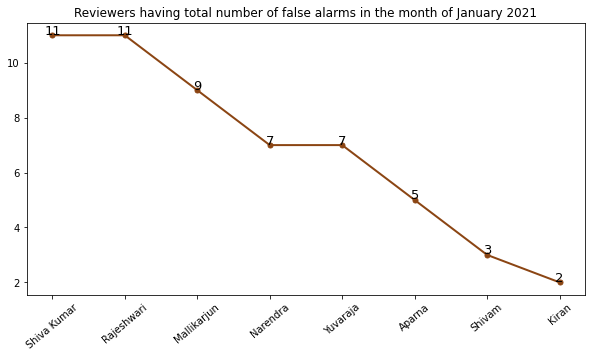

In [102]:
X=data_reviewers_support_January['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='saddlebrown', marker='o', linestyle='solid',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers having total number of false alarms in the month of January 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.03, "%d" %v, ha="center",fontdict={'fontsize':'13'})
plt.show()


#### 3] February 2021

In [103]:
data_reviewers_support_February=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-02-01') & (data_reviewers_support['Date'] <= '2021-02-28')]
data_reviewers_support_February

,Date,Rating,Reviewers,False_Alarm_Creation
59,2021-02-01,missed collision,Shivam,False Alarm
60,2021-02-01,missed collision,Aparna,False Alarm
61,2021-02-02,missed collision,Aparna,False Alarm
62,2021-02-03,missed collision,Yuvaraja,False Alarm
63,2021-02-03,missed collision,Aparna,False Alarm
64,2021-02-03,missed collision,Aparna,False Alarm
65,2021-02-03,missed collision,Yuvaraja,False Alarm
66,2021-02-03,missed collision,Aparna,False Alarm
67,2021-02-04,missed collision,Yuvaraja,False Alarm
68,2021-02-04,Wrong rating - No accident,Shivam,False Alarm


#### Count the number of False alarms and the reviewers

In [104]:
data_reviewers_support_February['False_Alarm_Creation'].count()

38

In [105]:
data_reviewers_support_February['Reviewers'].value_counts()

Aparna         11
Shivam          9
Yuvaraja        5
Rajeshwari      4
Shiva Kumar     3
Narendra        3
Kiran           3
Name: Reviewers, dtype: int64

In [106]:
data_reviewers_support_February['Reviewers'].count()

38

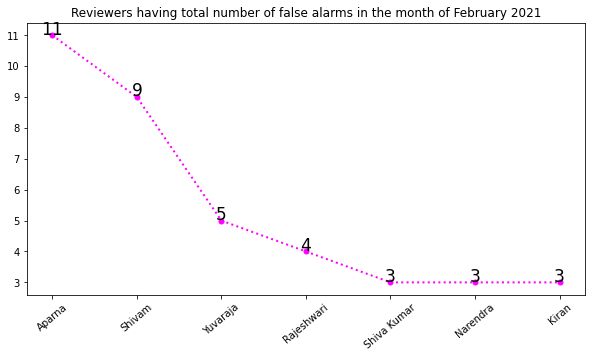

In [107]:
X=data_reviewers_support_February['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='fuchsia', marker='o', linestyle='dotted',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers having total number of false alarms in the month of February 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.03, "%d" %v, ha="center",fontdict={'fontsize':'17'})
plt.show()

#### 4] March 2021

In [108]:
data_reviewers_support_March=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-03-01') & (data_reviewers_support['Date'] <= '2021-03-31')]
data_reviewers_support_March

,Date,Rating,Reviewers,False_Alarm_Creation
97,2021-03-01,Wrong rating - No accident,Shiva Kumar,False Alarm
98,2021-03-02,Wrong rating - Accident,Aparna,False Alarm
99,2021-03-02,Wrong rating - Accident,Shivam,False Alarm
100,2021-03-03,Wrong rating - Accident,Narendra,False Alarm
101,2021-03-03,Wrong rating - Accident,Aparna,False Alarm
102,2021-03-03,Wrong rating - Accident,Aparna,False Alarm
103,2021-03-03,Wrong rating - Accident,Narendra,False Alarm
104,2021-03-03,Wrong rating - No accident,Narendra,False Alarm
105,2021-03-04,Wrong rating - No accident,Kiran,False Alarm
106,2021-03-04,Wrong rating - No accident,Yuvaraja,False Alarm


#### Count the number of False alarms and the reviewers

In [109]:
data_reviewers_support_March['False_Alarm_Creation'].count()

54

In [110]:
data_reviewers_support_March['Reviewers'].value_counts()

Aparna         14
Shivam         13
Kiran           7
Narendra        6
Yuvaraja        5
Shiva Kumar     4
Mallikarjun     3
Rajeshwari      2
Name: Reviewers, dtype: int64

In [111]:
data_reviewers_support_March['Reviewers'].count()

54

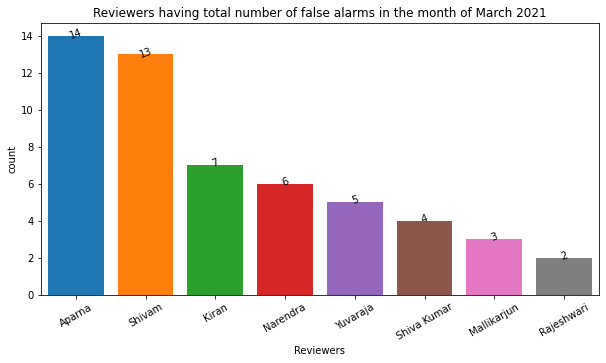

In [112]:
plt.figure(figsize=(10,5))
splot=sns.countplot(data_reviewers_support_March['Reviewers'],order=data_reviewers_support_March['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers having total number of false alarms in the month of March 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 5] April 2021

In [113]:
data_reviewers_support_April=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-04-01') & (data_reviewers_support['Date'] <= '2021-04-30')]
data_reviewers_support_April

,Date,Rating,Reviewers,False_Alarm_Creation
151,2021-04-04,Wrong rating - Accident,Shivam,False Alarm
152,2021-04-04,Wrong rating - Accident,Aparna,False Alarm
153,2021-04-04,Wrong rating - No accident,Aparna,False Alarm
154,2021-04-05,Wrong rating - No accident,Leenu,False Alarm
155,2021-04-05,Wrong rating - No accident,Shiva Kumar,False Alarm
156,2021-04-06,Wrong rating - No accident,Leenu,False Alarm
157,2021-04-06,Wrong rating - No accident,Shiva Kumar,False Alarm
158,2021-04-07,Wrong rating - Accident,Raushan,False Alarm
159,2021-04-07,Wrong rating - Accident,Aparna,False Alarm
160,2021-04-08,Wrong rating - No accident,Raushan,False Alarm


#### Count the number of False alarms and the reviewers

In [114]:
data_reviewers_support_April['False_Alarm_Creation'].count()

24

In [115]:
data_reviewers_support_April['Reviewers'].value_counts()

Aparna         7
Raushan        5
Shivam         4
Shiva Kumar    3
Leenu          2
Yuvaraja       1
Rajeshwari     1
Mallikarjun    1
Name: Reviewers, dtype: int64

In [116]:
data_reviewers_support_April['Reviewers'].count()

24

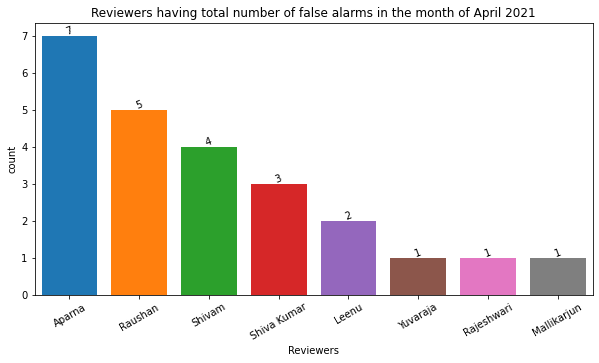

In [117]:
plt.figure(figsize=(10,5))
splot=sns.countplot(data_reviewers_support_April['Reviewers'],order=data_reviewers_support_April['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers having total number of false alarms in the month of April 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5),textcoords = 'offset points',rotation=20)
plt.show()